In [110]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [111]:
data = {}
for root, dirs, files in os.walk("."):
    for name in files:
        if 'xlsx' in name:
            print(os.path.join(root, name))
            key = name[name.find('_')+1:name.rfind('.xlsx')]
            
            data[key] =pd.read_excel('./'+name,skiprows=7)
            
            
            

./10_Probleme_2.xlsx
./11_Wirtschaft_allg_2.xlsx
./12_Wirtschaft_eig_1.xlsx
./13_Wirtschaft_Entw.xlsx
./14_Kompetenz_Wirtschaft_2.xlsx
./15_Kompetenz_Arbeit_1.xlsx
./16_Kompetenz_Soziales_1.xlsx
./17_Kompetenz_soz_Ger.xlsx
./1_Projektion.xlsx
./2_Stimmung.xlsx
./3_Keine_Wahlabsicht_1.xlsx
./4_Koalition_1.xlsx
./4b_Bundeskanzler_1.xlsx
./5_Arbeit_BR.xlsx
./6_Zuf_Reg_1.xlsx
./7_Zuf_Opp_1.xlsx
./8_Sympathiewerte_1.xlsx
./9_Probleme_1.xlsx


In [112]:
myframe = data['Probleme_2']
myframe2 = data['Projektion']

In [113]:
frames = []
for key in data:
    mask = (data[key]).ix[:,1] > '2010-01-01'
    data[key]  = data[key][mask]
    data[key]  = (data[key]).dropna(axis=1,how='all')
    frames.append(data[key])

/opt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


In [114]:
new_frame=  pd.concat(frames)

In [130]:
heat = new_frame.corr()
heat

,Arbeitslosigkeit,Ausländer/Integration/Flüchtlinge,Bildung,CDU/CSU,CDU/CSU-FDP,CDU/CSU-Grüne,CDU/CSU-SPD,Euro/Finanzkrise,FDP,GRÜNE,...,abwärts,aufwärts,gut,keine,schlecht,teils/teils,unverändert,weiß nicht,"weiß nicht, ob bzw. welche Partei ich wählen würde",würde nicht wählen
Arbeitslosigkeit,1.000000,-0.766809,0.598538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ausländer/Integration/Flüchtlinge,-0.766809,1.000000,-0.698568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bildung,0.598538,-0.698568,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDU/CSU,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.000822,-0.147025,...,NaN,NaN,NaN,0.336084,NaN,NaN,NaN,0.113011,NaN,NaN
CDU/CSU-FDP,NaN,NaN,NaN,NaN,1.000000,-0.147888,-0.420357,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDU/CSU-Grüne,NaN,NaN,NaN,NaN,-0.147888,1.000000,-0.172676,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDU/CSU-SPD,NaN,NaN,NaN,NaN,-0.420357,-0.172676,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Euro/Finanzkrise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FDP,NaN,NaN,NaN,-0.000822,NaN,NaN,NaN,NaN,1.000000,-0.066077,...,NaN,NaN,NaN,0.624210,NaN,NaN,NaN,0.203479,NaN,NaN
GRÜNE,NaN,NaN,NaN,-0.147025,NaN,NaN,NaN,NaN,-0.066077,1.000000,...,NaN,NaN,NaN,0.126114,NaN,NaN,NaN,0.262290,NaN,NaN


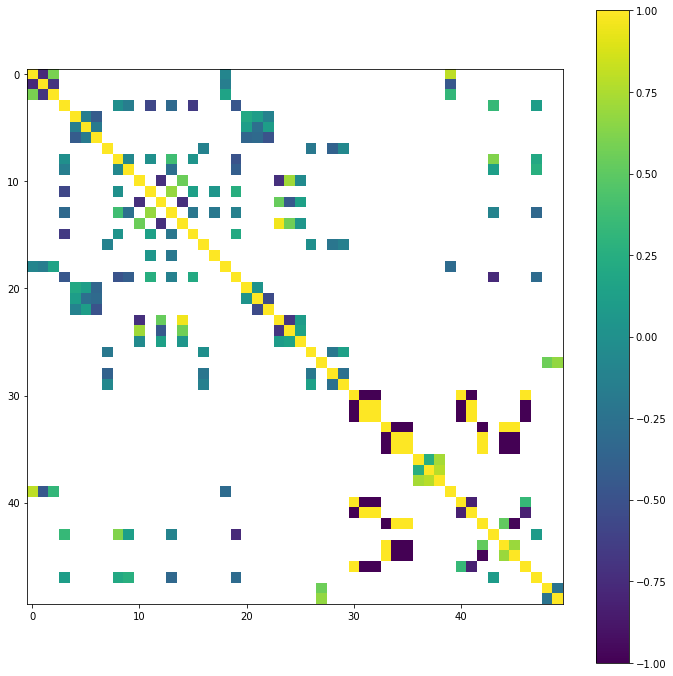

In [129]:
fig, ax = plt.subplots(1,figsize=(12,12))
nappa = ax.imshow(heat)
fig.colorbar(nappa)